In [3]:
import numpy as np
import pandas as pd

In [5]:
!pip install  scikit-learn=='1.3.2'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 23.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [1]:
import sklearn

print(sklearn.__version__)

1.3.2


In [4]:
match = pd.read_csv("matches.csv")
delivery = pd.read_csv("deliveries.csv")

In [ ]:
print(match.head(1))

   id    Season       city        date                team1  \
0   1  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

   result  dl_applied               winner  win_by_runs  win_by_wickets  \
0  normal           0  Sunrisers Hyderabad           35               0   

  player_of_match                                      venue      umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   

    umpire2 umpire3  
0  NJ Llong     NaN  


In [ ]:
print(delivery.head(1))

   match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills            0.0  ...       0.0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0          0.0          0.0           0.0           0.0         0.0   

   total_runs  player_dismissed dismissal_kind fielder  
0         0.0               NaN            NaN     NaN  

[1 rows x 21 columns]


In [5]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

<ipython-input-5-40e5f6bc616a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


In [6]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [7]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [8]:
print(match.shape)
print(match_df['team1'].unique())

(756, 18)
['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors']


In [9]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [10]:


match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [11]:
match_df = match_df[match_df['dl_applied'] == 0]

In [12]:
match_df.shape

(385, 20)

In [13]:
match_df = match_df[['match_id','city','winner','total_runs']]
delivery_df = match_df.merge(delivery,on='match_id')
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [14]:
delivery_df ['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

<ipython-input-14-a68b80999705>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df ['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [15]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,206.0,119.0
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,206.0,118.0
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,206.0,117.0
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0,204.0,116.0
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0,200.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91939,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,4.0,KK Nair,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,22.0,130.0,98.0
91940,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,5.0,KK Nair,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,23.0,129.0,97.0
91941,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,6.0,SV Samson,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,23.0,129.0,96.0
91942,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,7.0,SV Samson,...,0.0,4.0,0.0,4.0,NaN,NaN,NaN,27.0,125.0,95.0


In [34]:
# Check data types of each column
for column in final_df.columns:
    # Get the data type of the column
    data_type = final_df[column].dtype
    print(f"Column '{column}' - Data Type: {data_type}")


Column 'batting_team' - Data Type: object
Column 'bowling_team' - Data Type: object
Column 'city' - Data Type: object
Column 'runs_left' - Data Type: float64
Column 'balls_left' - Data Type: float64
Column 'wickets' - Data Type: int64
Column 'total_runs_x' - Data Type: float64
Column 'crr' - Data Type: float64
Column 'rrr' - Data Type: float64
Column 'result' - Data Type: int64


In [16]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets


<ipython-input-16-2bf5ced7c142>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values


In [17]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [18]:
def result(row):
  return 1 if row['batting_team'] == row['winner'] else 0

delivery_df['result'] = delivery_df.apply(result,axis=1)

In [19]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]
final_df = final_df.sample(final_df.shape[0])

final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
28180,Royal Challengers Bangalore,Mumbai Indians,Port Elizabeth,44.0,18.0,4,157.0,6.647059,14.666667,0


In [20]:
final_df.dropna(inplace=True)

In [21]:
final_df = final_df[final_df['balls_left'] != 0]

In [22]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [23]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
29375,Deccan Chargers,Delhi Daredevils,Durban,40.0,33.0,7,173.0,9.172414,7.272727
67651,Deccan Chargers,Kings XI Punjab,Hyderabad,86.0,39.0,5,170.0,6.222222,13.230769
21506,Chennai Super Kings,Delhi Daredevils,Durban,154.0,99.0,10,189.0,10.000000,9.333333
17942,Kings XI Punjab,Deccan Chargers,Chandigarh,156.0,110.0,10,175.0,11.400000,8.509091
27204,Rajasthan Royals,Royal Challengers Bangalore,Centurion,14.0,38.0,8,105.0,6.658537,2.210526
...,...,...,...,...,...,...,...,...,...
20469,Chennai Super Kings,Mumbai Indians,Cape Town,24.0,6.0,4,165.0,7.421053,24.000000
62943,Royal Challengers Bangalore,Kings XI Punjab,Chandigarh,155.0,109.0,9,163.0,4.363636,8.532110
48473,Mumbai Indians,Delhi Daredevils,Delhi,49.0,62.0,8,95.0,4.758621,4.741935
64234,Mumbai Indians,Kings XI Punjab,Chandigarh,98.0,50.0,7,168.0,6.000000,11.760000


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8226289134438306

In [27]:
pipe.predict_proba(X_test)[10]

array([0.94613083, 0.05386917])

In [28]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [29]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [30]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4.0,0,70.8,29.2
10467,2,8.0,0,64.7,35.3
10473,3,1.0,0,71.9,28.1
10479,4,7.0,1,80.5,19.5
10485,5,12.0,0,71.2,28.8
10491,6,13.0,0,58.5,41.5
10497,7,9.0,0,52.0,48.0
10505,8,15.0,0,35.2,64.8
10511,9,7.0,0,32.6,67.4
10518,10,17.0,0,17.5,82.5


Text(0.5, 1.0, 'Target-178.0')

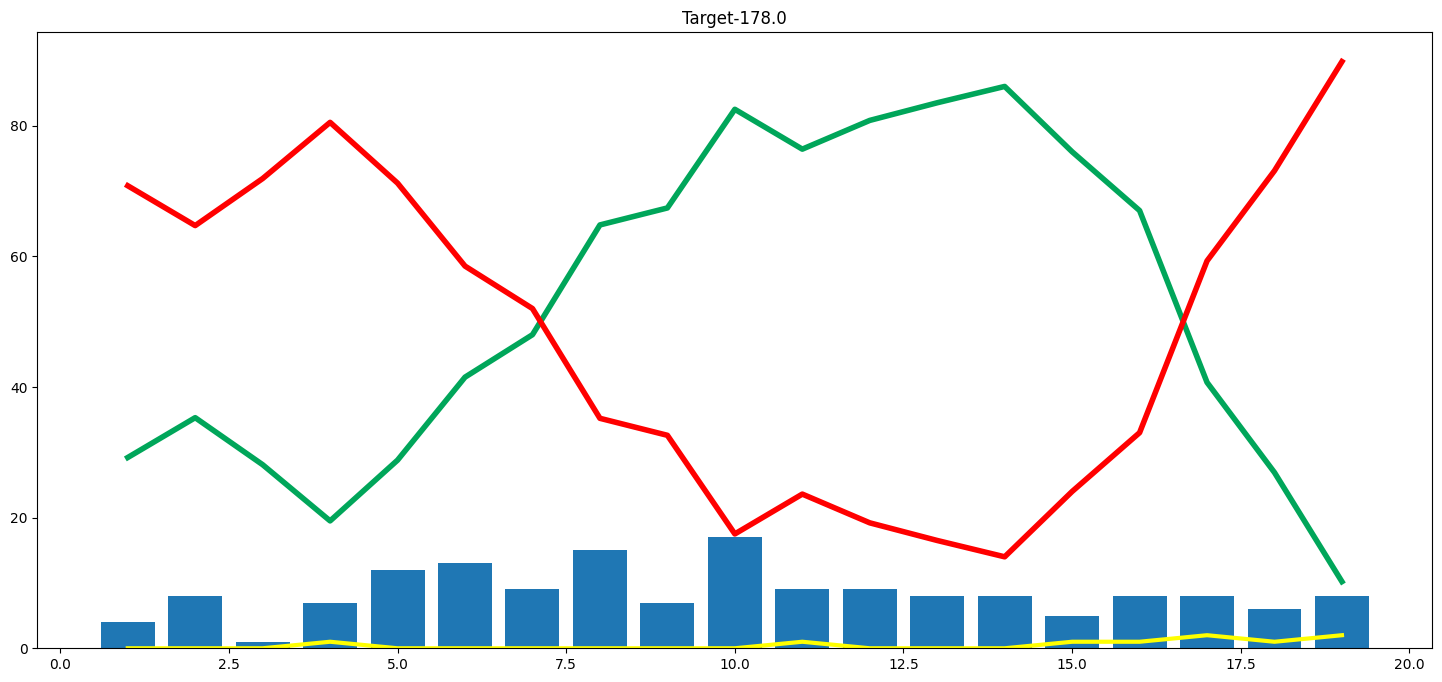

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [32]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))